# EDA_BASIC

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
plt.style.use('bmh')

In [3]:
df1 = pd.read_csv(r'dataR2.csv')
df2 = pd.read_excel(r'Real estate valuation data set.xlsx')

In [4]:
print(df1.head())
print(df2.head())   

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores

In [5]:
df1.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [6]:
df2.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
df2=df2.drop(['No'], axis=1)

In [8]:
df1.count()

Age               116
BMI               116
Glucose           116
Insulin           116
HOMA              116
Leptin            116
Adiponectin       116
Resistin          116
MCP.1             116
Classification    116
dtype: int64

In [9]:
df2.count()

X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

###
### detaction of the duplicates

In [10]:
df1[df1.duplicated()].shape

(0, 10)

In [11]:
df2[df2.duplicated()].shape

(0, 7)

###
### detaction of the null values

In [12]:
print(df1.isnull().sum())
print(df2.isnull().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


###
### Box plotting

##### For df1 :

<Axes: xlabel='Classification'>

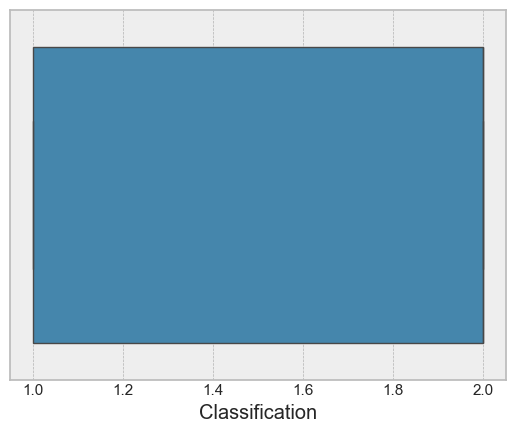

In [13]:
sns.boxplot(x=df1['Classification'])

##### For df2 :

<Axes: xlabel='Y house price of unit area'>

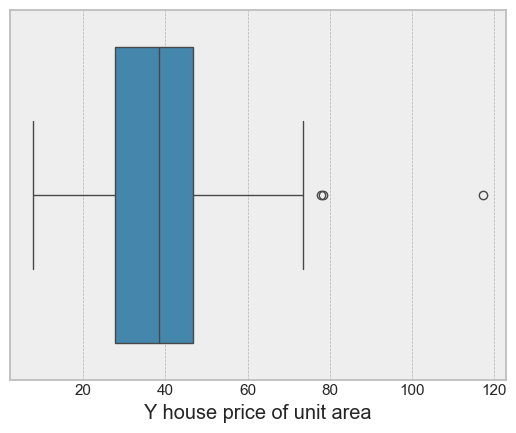

In [14]:
sns.boxplot(x=df2['Y house price of unit area'])

###
### Removing outliears

In [15]:
Q11 = df1.quantile(0.25)
Q31 = df1.quantile(0.75)
IQR1 = Q31 - Q11
print(IQR1)

Q12 = df2.quantile(0.25)
Q32 = df2.quantile(0.75)
IQR2 = Q32 - Q12
print(IQR2)

Age                26.000000
BMI                 8.268237
Glucose            16.250000
Insulin             6.830000
HOMA                1.939821
Leptin             25.064625
Adiponectin         6.341687
Resistin           10.873445
MCP.1             430.106750
Classification      1.000000
dtype: float64
X1 transaction date                          0.500000
X2 house age                                19.125000
X3 distance to the nearest MRT station    1164.954200
X4 number of convenience stores              5.000000
X5 latitude                                  0.014455
X6 longitude                                 0.015220
Y house price of unit area                  18.900000
dtype: float64


##### For df1 :

In [16]:
print("df1-shape Before:",df1.shape)
df1 = df1[~((df1 < (Q11 - 1.5 * IQR1)) |(df1 > (Q31 + 1.5 * IQR1))).any(axis=1)]
print("df1-shape After:",df1.shape)

df1-shape Before: (116, 10)
df1-shape After: (80, 10)


##### For df2 :

In [17]:
print("df2-shape Before:",df2.shape)
df2 = df2[~((df2 < (Q12 - 1.5 * IQR2)) |(df2 > (Q32 + 1.5 * IQR2))).any(axis=1)]
print("df2-shape After:",df2.shape)

df2-shape Before: (414, 7)
df2-shape After: (371, 7)


###
### Graph plotting

##### For df1 :

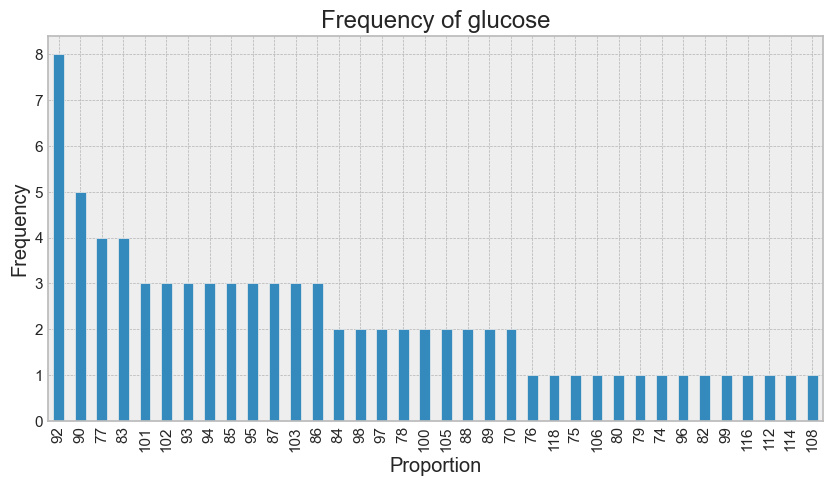

In [18]:
df1.Glucose.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frequency of glucose")
plt.ylabel('Frequency')
plt.xlabel('Proportion');

##### For df2 :

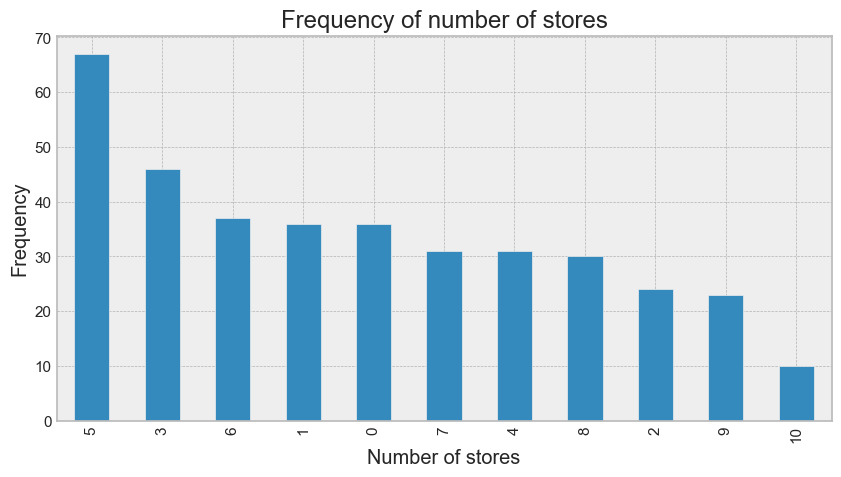

In [19]:
df2['X4 number of convenience stores'].value_counts().nlargest(11).plot(kind='bar', figsize=(10,5))
plt.title("Frequency of number of stores")
plt.ylabel('Frequency')
plt.xlabel('Number of stores');

###
### Heatmap representation

##### For df1 :

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,-0.081060,0.124850,0.044826,0.064234,-0.072739,-0.123464,-0.191649,0.055750,-0.131619
BMI,-0.081060,1.000000,-0.110771,0.337343,0.279420,0.638064,-0.269578,0.196327,0.283625,-0.345974
Glucose,0.124850,-0.110771,1.000000,0.269847,0.422540,0.009790,0.078031,-0.105690,-0.174807,0.319654
Insulin,0.044826,0.337343,0.269847,1.000000,0.982338,0.422019,0.075404,0.148674,0.086656,0.083722
HOMA,0.064234,0.279420,0.422540,0.982338,1.000000,0.380224,0.108528,0.125024,0.067639,0.137771
Leptin,-0.072739,0.638064,0.009790,0.422019,0.380224,1.000000,-0.197001,0.185787,0.120171,-0.203396
Adiponectin,-0.123464,-0.269578,0.078031,0.075404,0.108528,-0.197001,1.000000,-0.074306,-0.184889,0.068936
Resistin,-0.191649,0.196327,-0.105690,0.148674,0.125024,0.185787,-0.074306,1.000000,0.348530,0.308625
MCP.1,0.055750,0.283625,-0.174807,0.086656,0.067639,0.120171,-0.184889,0.348530,1.000000,-0.134433
Classification,-0.131619,-0.345974,0.319654,0.083722,0.137771,-0.203396,0.068936,0.308625,-0.134433,1.000000


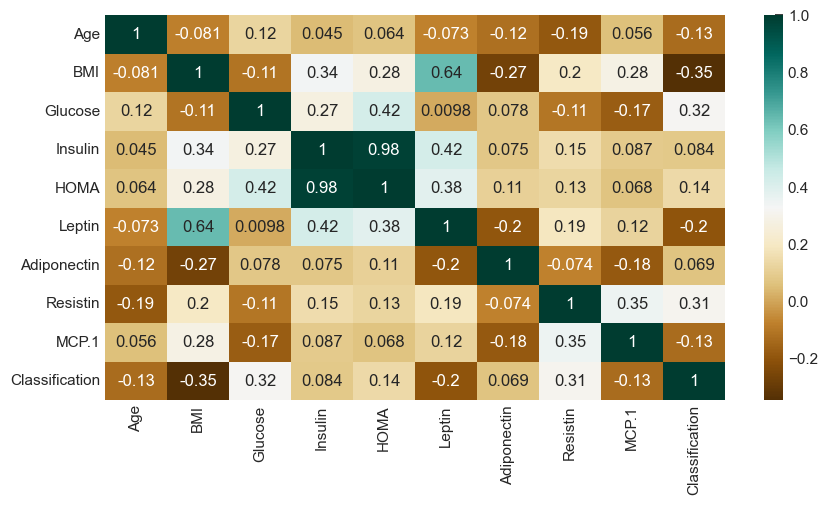

In [20]:
plt.figure(figsize=(10,5))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

##### For df2 :

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,-0.004756,0.071438,0.018207,0.035130,-0.009494,0.072176
X2 house age,-0.004756,1.000000,-0.050015,0.055115,0.107225,0.018306,-0.253273
X3 distance to the nearest MRT station,0.071438,-0.050015,1.000000,-0.540865,-0.341925,-0.616209,-0.671904
X4 number of convenience stores,0.018207,0.055115,-0.540865,1.000000,0.308797,0.291690,0.522053
X5 latitude,0.035130,0.107225,-0.341925,0.308797,1.000000,0.083142,0.455005
X6 longitude,-0.009494,0.018306,-0.616209,0.291690,0.083142,1.000000,0.391990
Y house price of unit area,0.072176,-0.253273,-0.671904,0.522053,0.455005,0.391990,1.000000


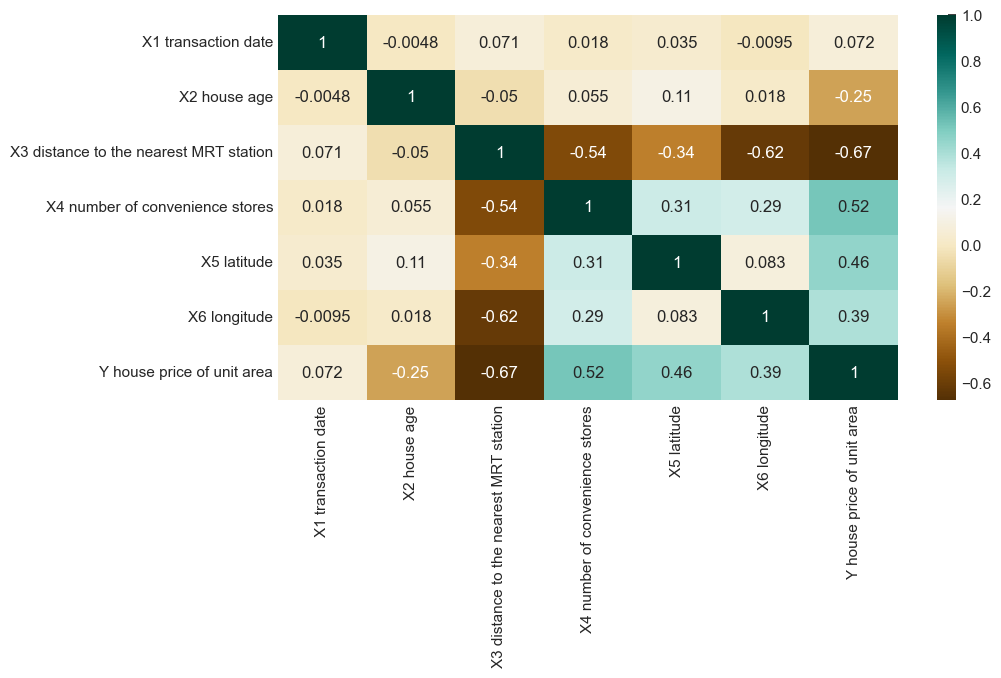

In [21]:
plt.figure(figsize=(10,5))
c= df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

###
### Subplots

##### For df1 :

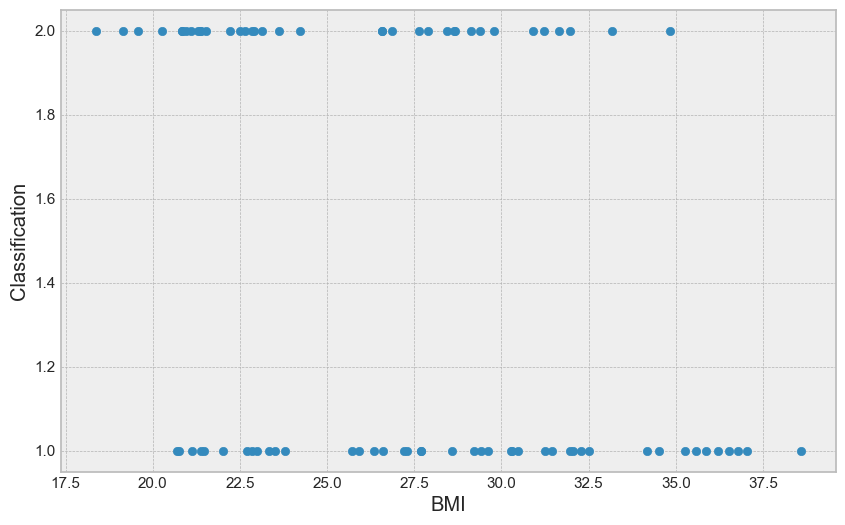

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df1['BMI'], df1['Classification'])
ax.set_xlabel('BMI')
ax.set_ylabel('Classification')
plt.show()

##### For df2 :

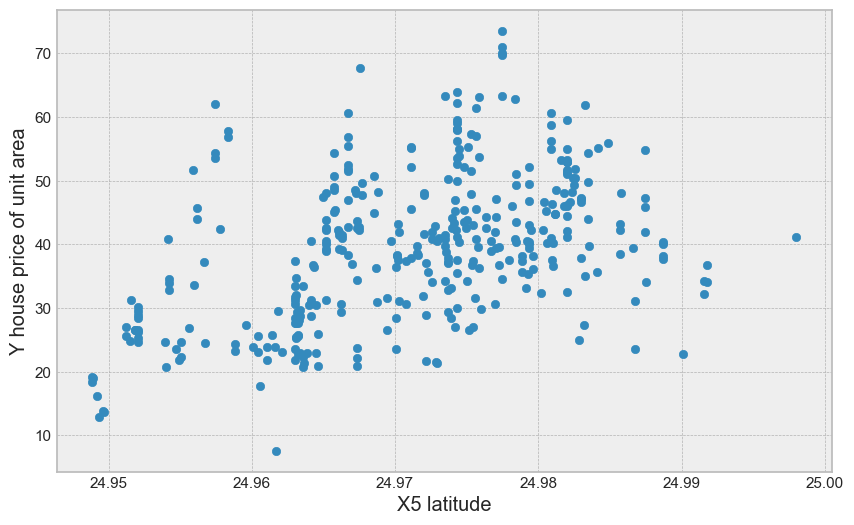

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['X5 latitude'], df2['Y house price of unit area'])
ax.set_xlabel('X5 latitude')
ax.set_ylabel('Y house price of unit area')
plt.show()

#
# EDA_ADVANCED

In [24]:
print(df1['Classification'].describe())
plt.figure(figsize=(9, 8))

count    80.000000
mean      1.462500
std       0.501737
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Classification, dtype: float64


<Figure size 900x800 with 0 Axes>

<Figure size 900x800 with 0 Axes>

count    371.000000
mean      39.527763
std       11.652456
min        7.600000
25%       30.650000
50%       40.000000
75%       47.200000
max       73.600000
Name: Y house price of unit area, dtype: float64


C:\Users\brind\AppData\Local\Temp\ipykernel_18772\2829071364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Y house price of unit area'], color='g', bins=100, hist_kws={'alpha': 0.5});


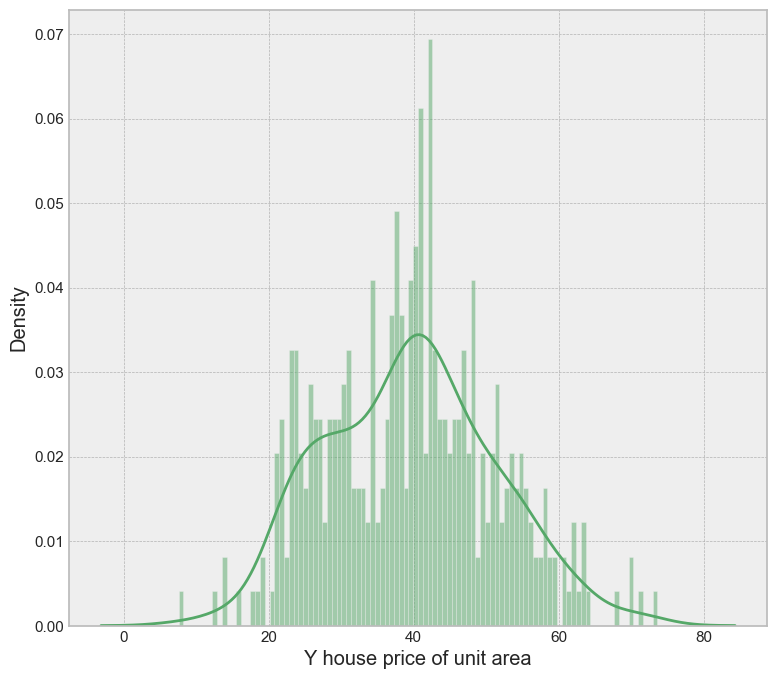

In [25]:
print(df2['Y house price of unit area'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df2['Y house price of unit area'], color='g', bins=100, hist_kws={'alpha': 0.5});

###
### Histograms of the features

##### For df1 :

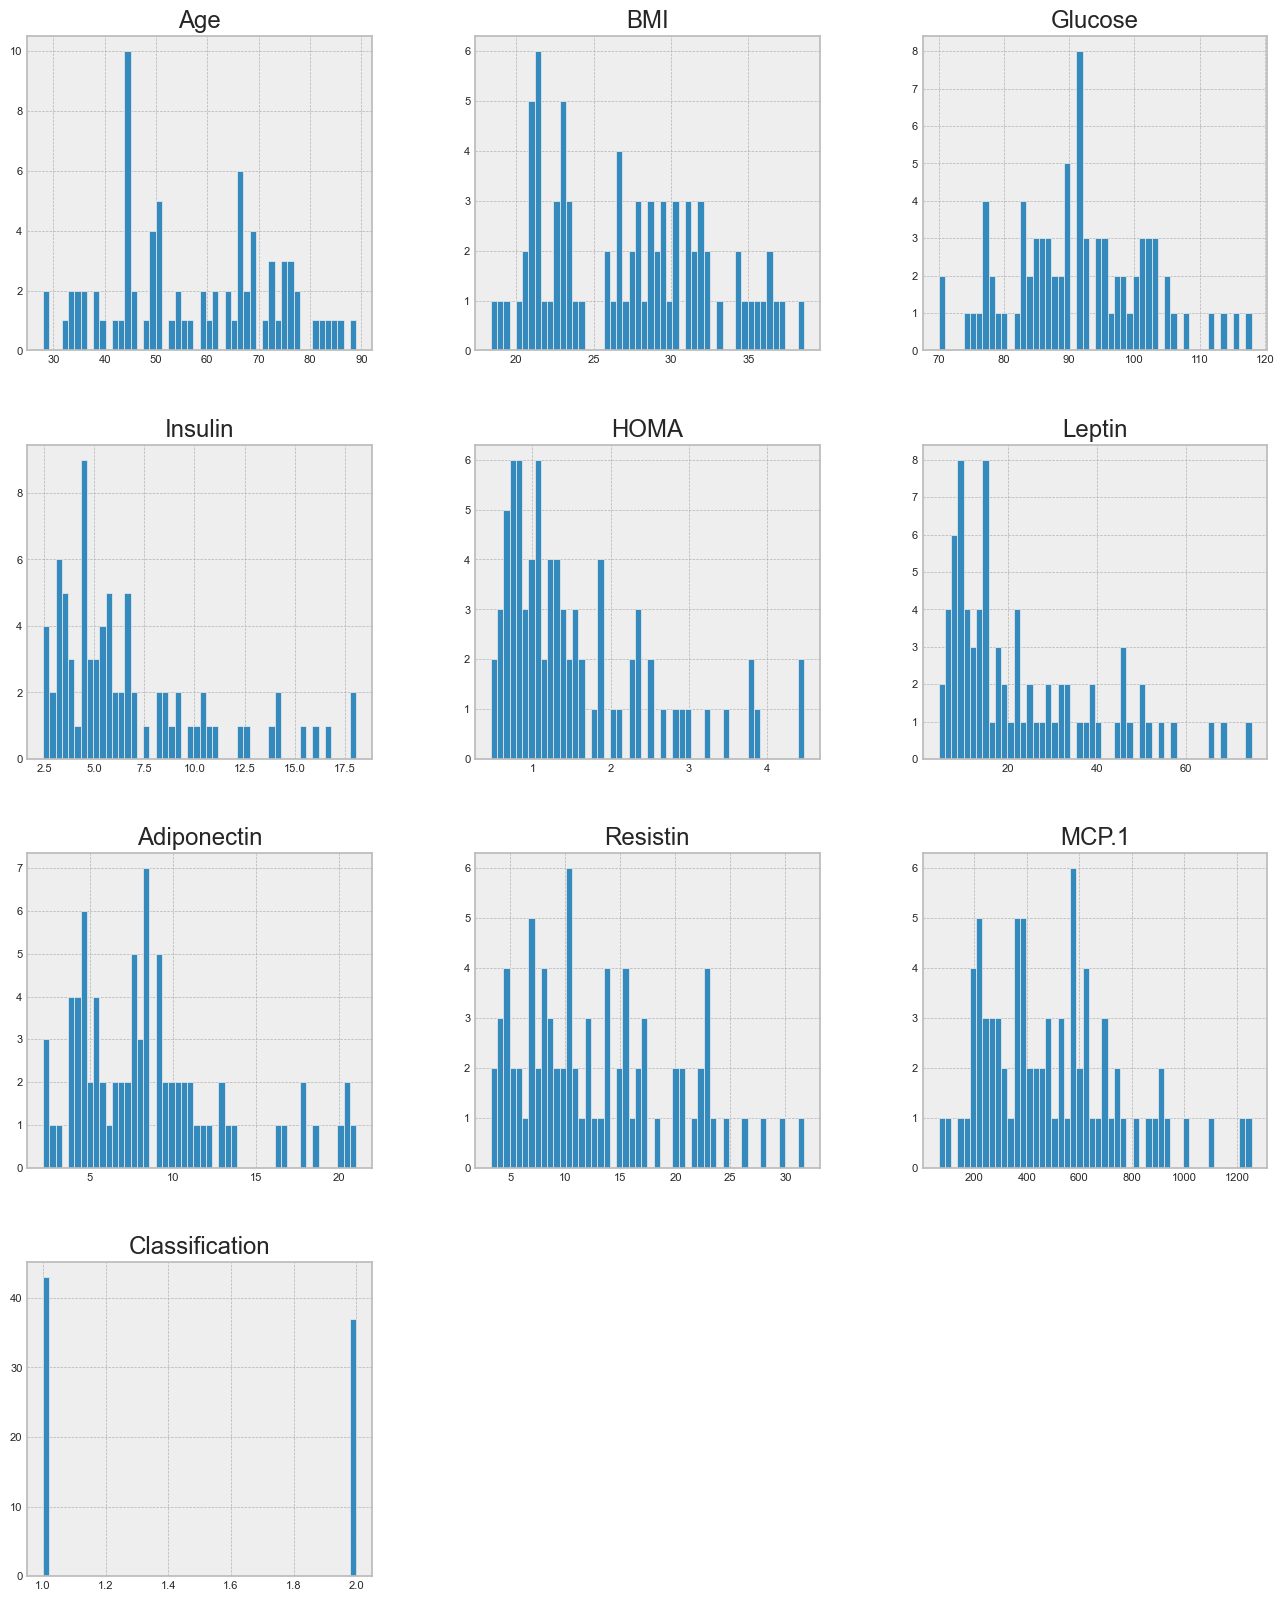

In [26]:
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

##### For df2 :

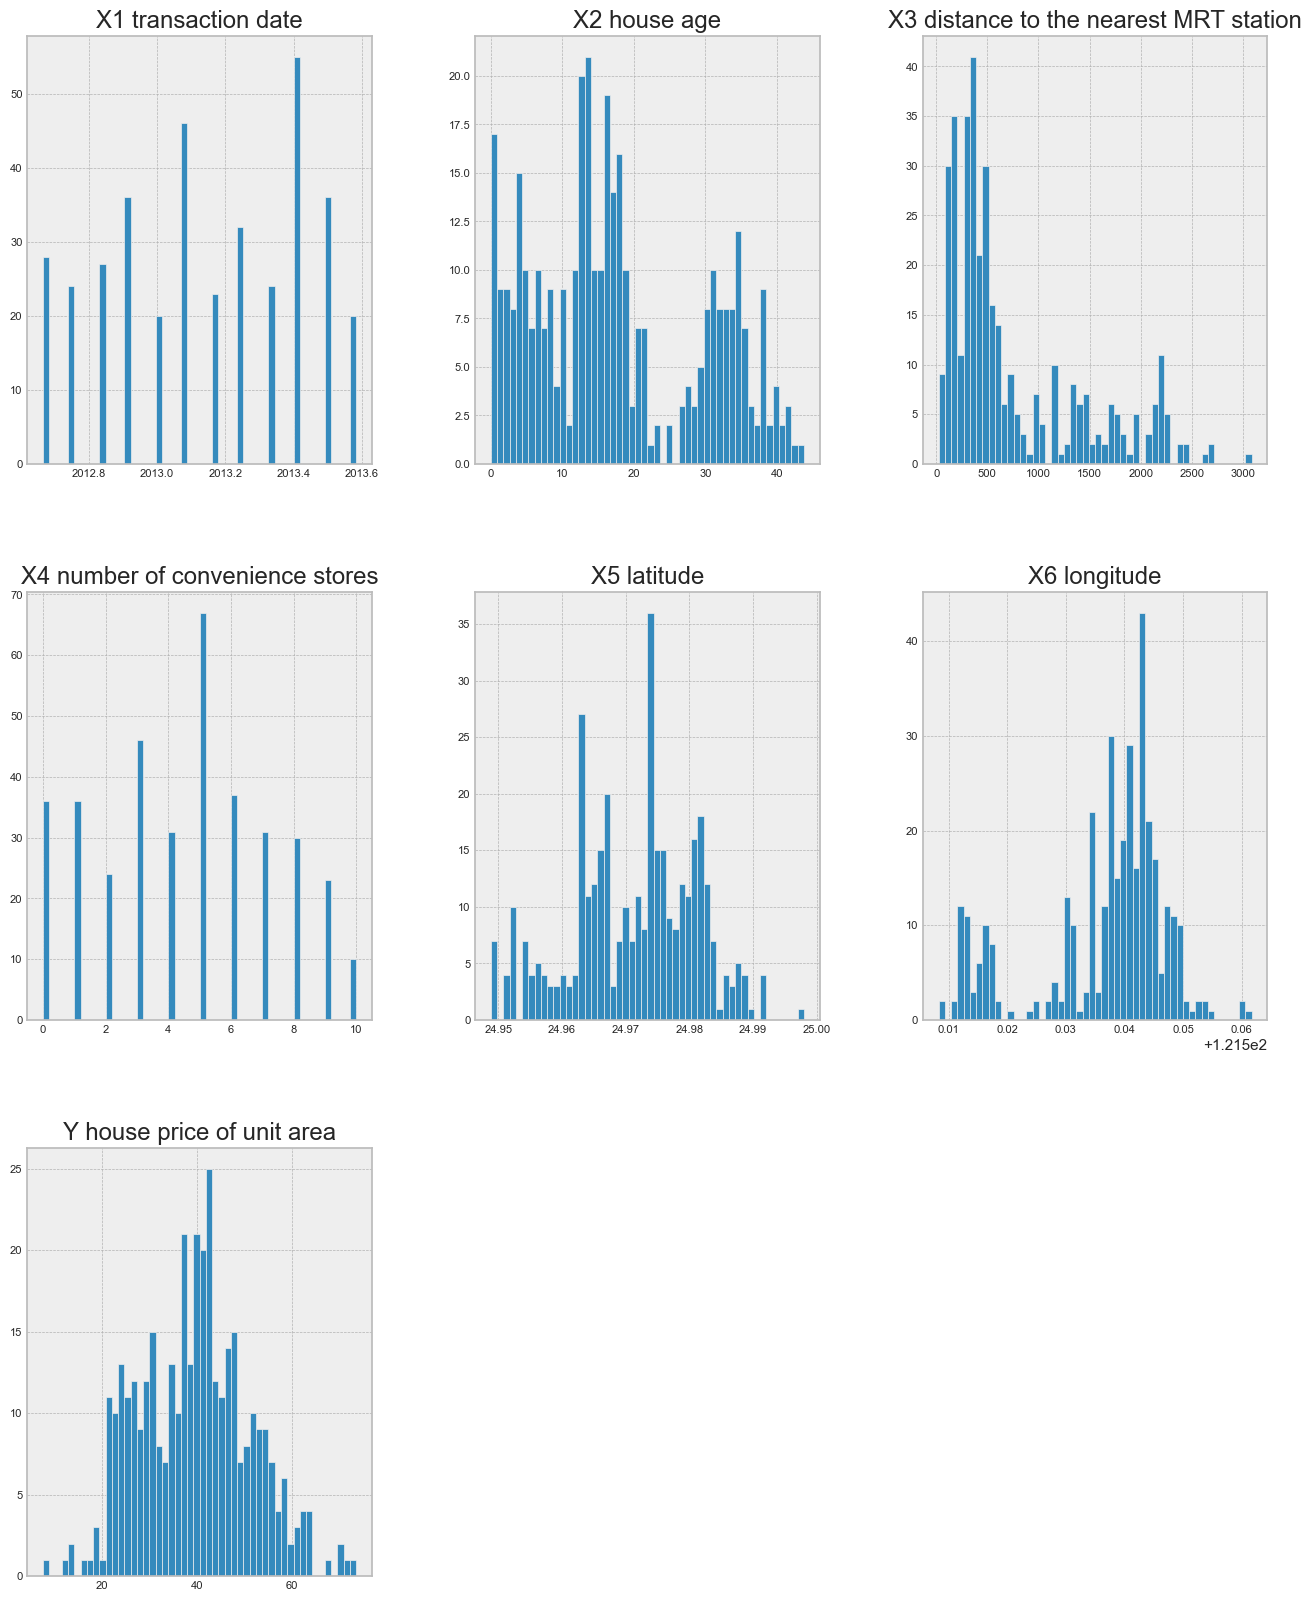

In [27]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

###
### Correlation

##### For df2 :

In [40]:
df2_corr = df2.corr()['Y house price of unit area'][:-1] 
features = df2_corr[abs(df2_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(features), features))

There is 2 strongly correlated values with SalePrice:
X4 number of convenience stores           0.522053
X3 distance to the nearest MRT station   -0.671904
Name: Y house price of unit area, dtype: float64


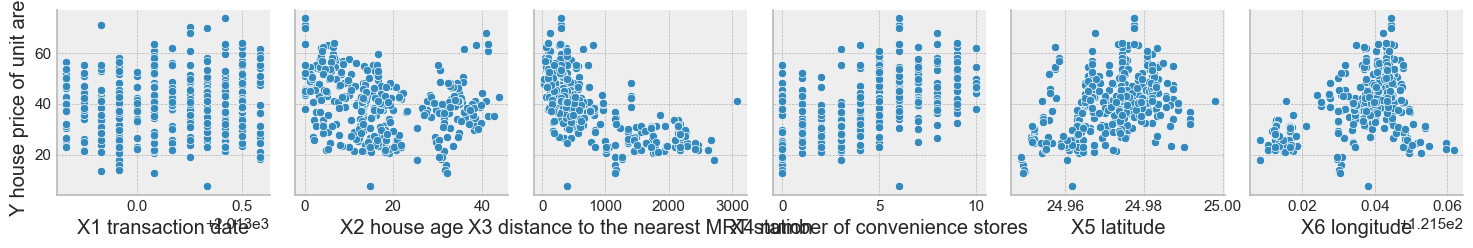

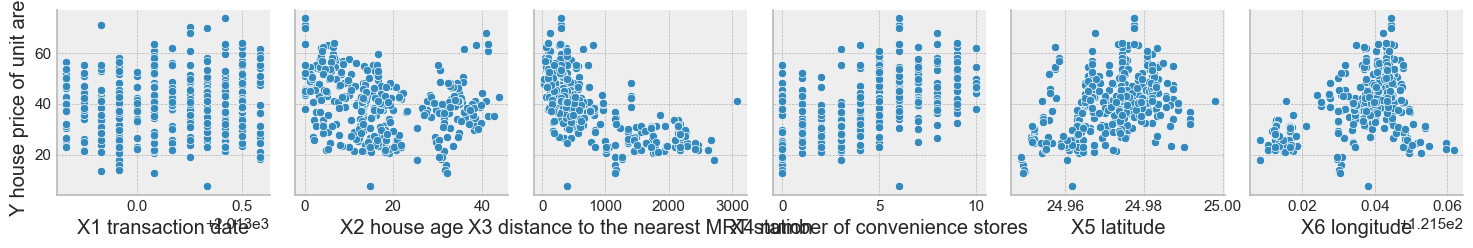

In [30]:
for i in range(0, len(df2.columns), 5):
    sns.pairplot(data=df2,
                x_vars=df2.columns[0:6],
                y_vars=['Y house price of unit area'])

###
### Feature to feature relationship

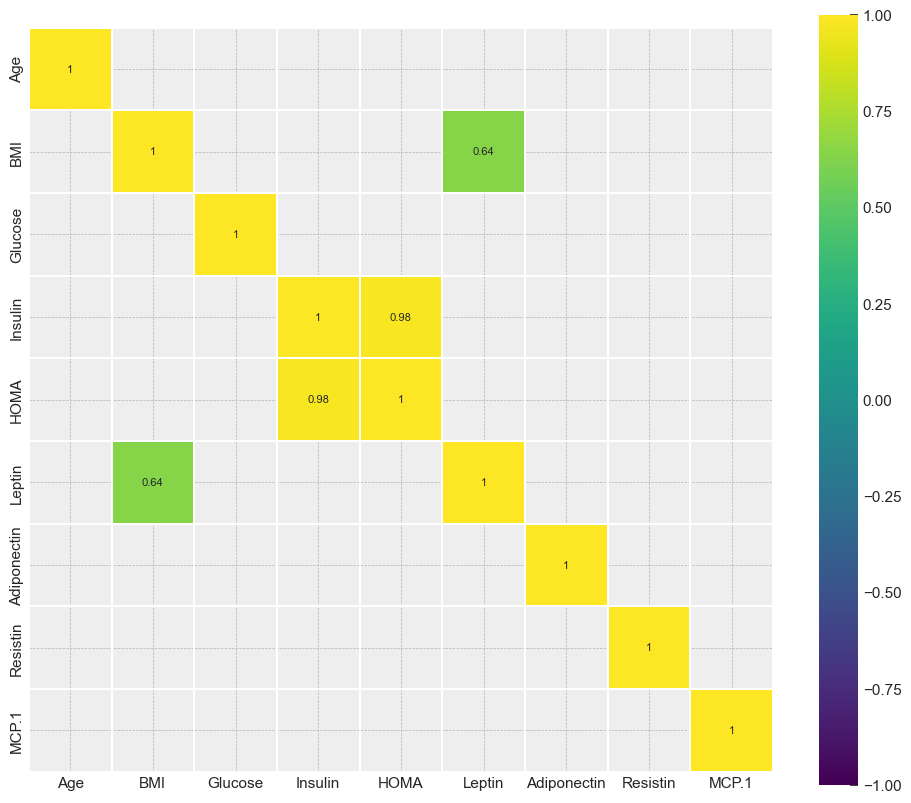

In [41]:
corr = df1.drop('Classification', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

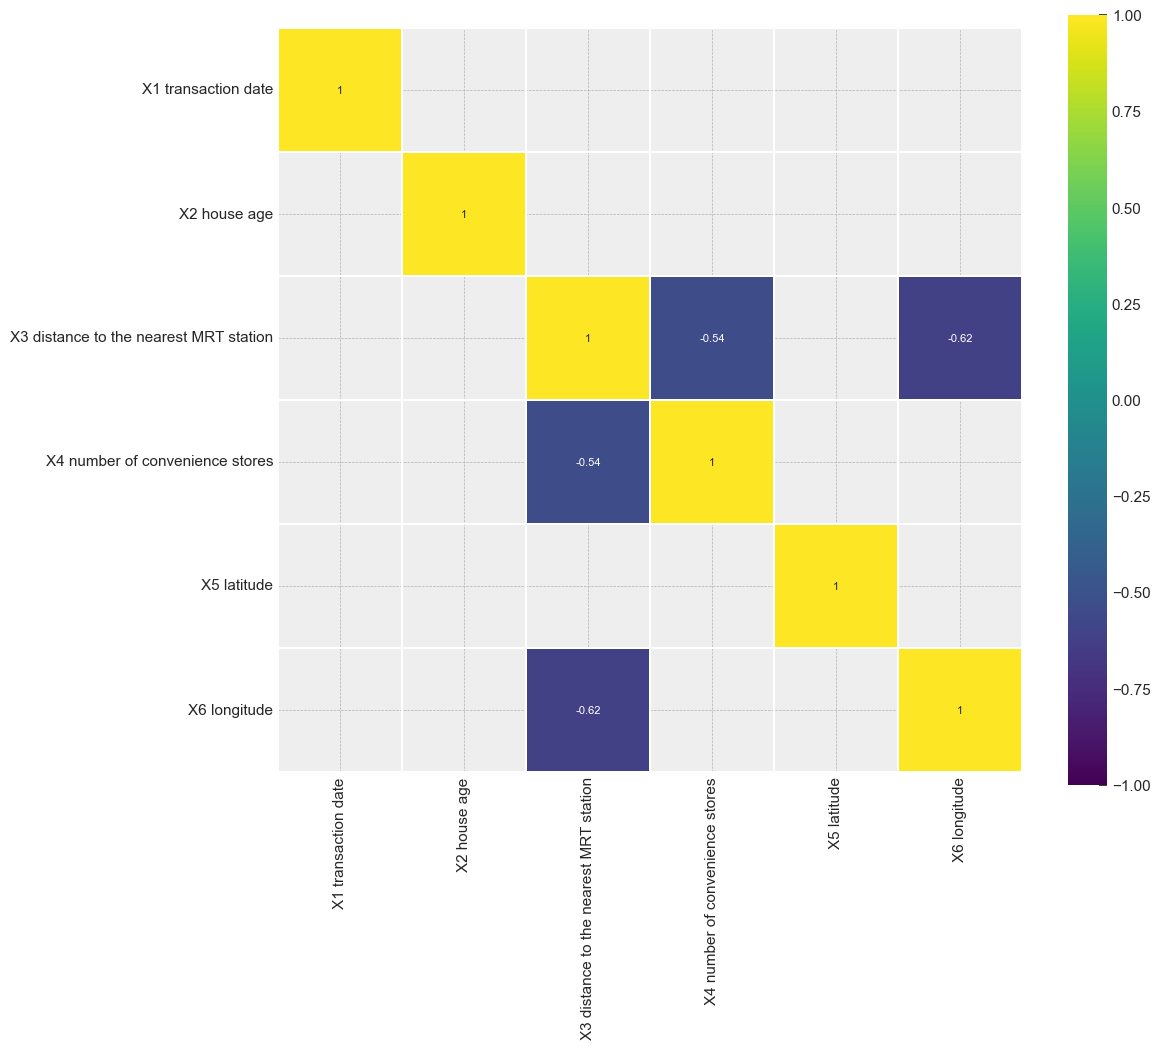

In [32]:
corr = df2.drop('Y house price of unit area', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

###
### Quantitive to quantitive relation

In [33]:
features_to_analyse=df2.columns.tolist()

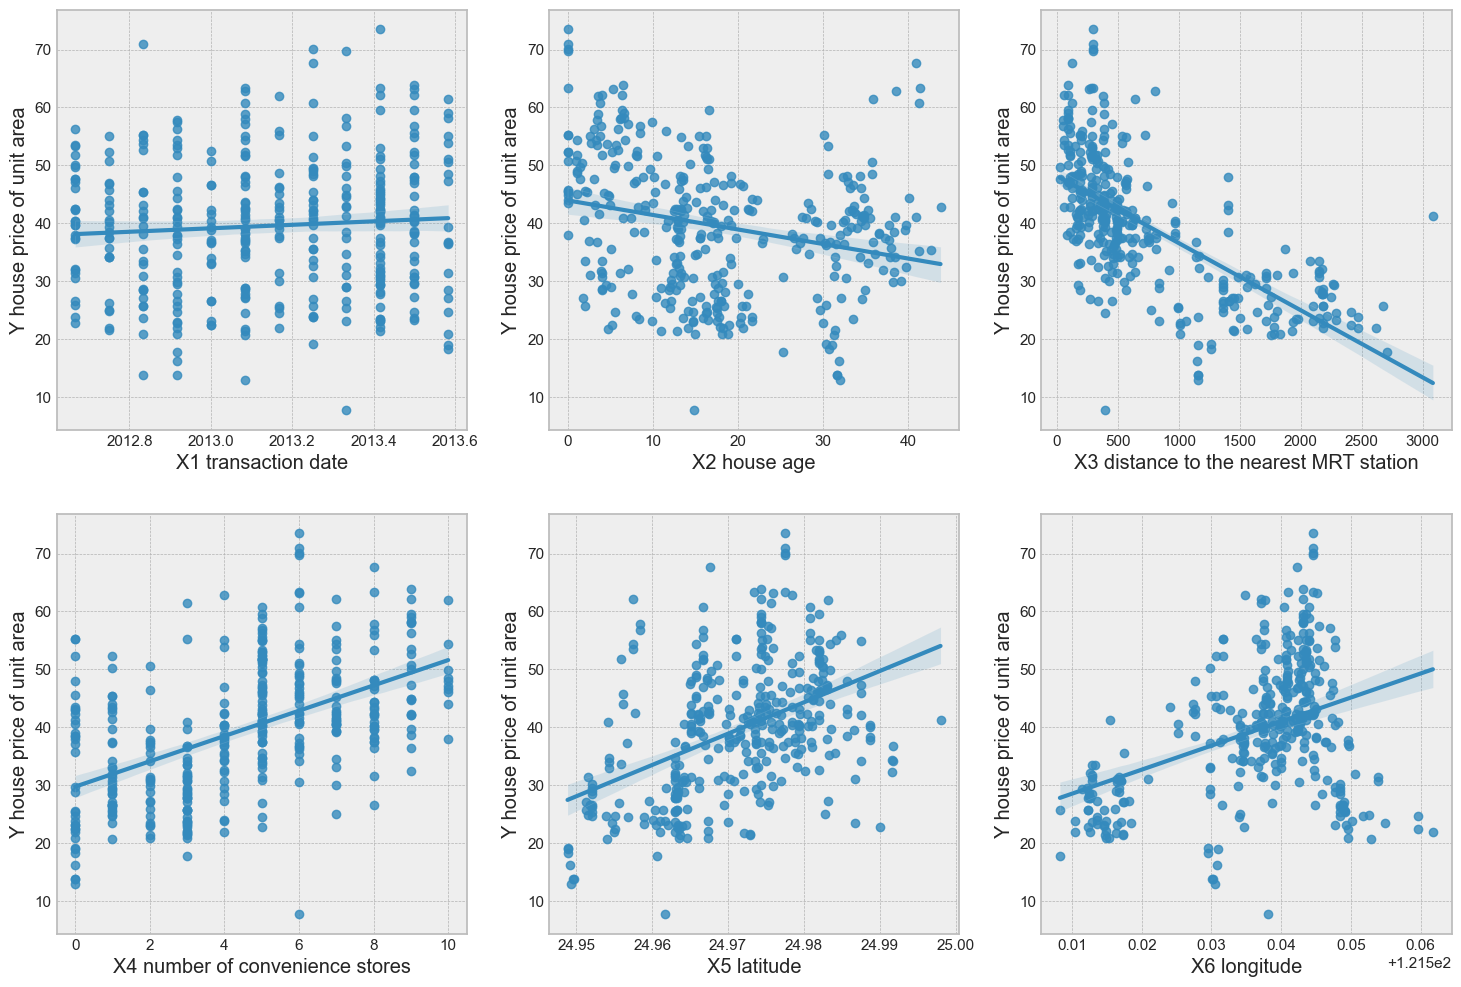

In [34]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Y house price of unit area', data=df2[features_to_analyse], ax=ax)


###
### Catagorical to quantitive realation

([0, 1], [Text(0, 0, '1'), Text(1, 0, '2')])

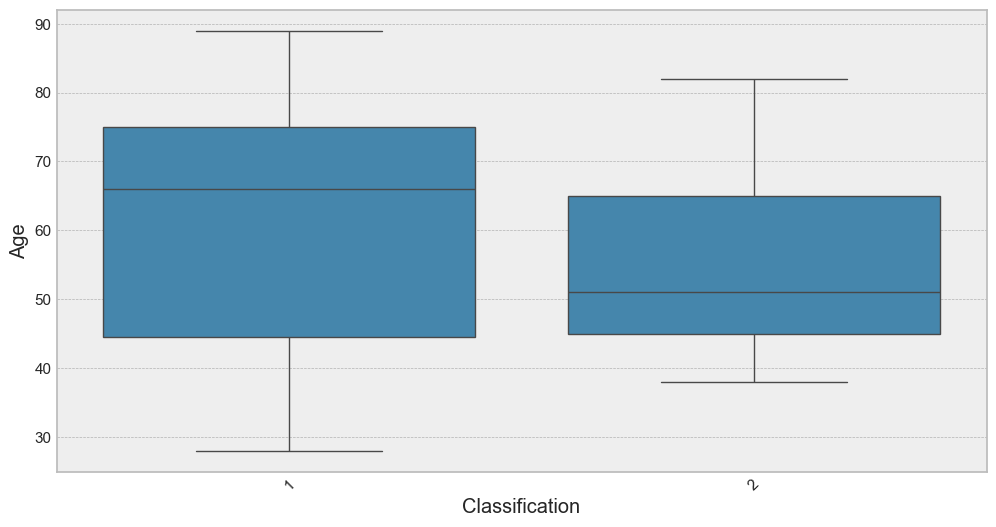

In [35]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Classification', y='Age', data=df1)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)